In [5]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# import os

num_classes = 2
img_rows, img_cols = 102, 96
batch_size = 16

from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/drive/MyDrive/copiedmangoset/Trainingdata'
validation_data_dir = '/content/drive/MyDrive/copiedmangoset/Testdata'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 878 images belonging to 2 classes.
Found 519 images belonging to 2 classes.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 81, activation = 'relu'))
# classifier.add(Dense(units = 32, activation = 'relu'))
# classifier.add(Dense(units = 16, activation = 'relu'))
# classifier.add(Dense(units = 8, activation = 'relu'))
# classifier.add(Dense(units = 2, activation = 'relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))



print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 102, 96, 32)       896       
_________________________________________________________________
activation (Activation)      (None, 102, 96, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 94, 32)       9248      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 94, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 47, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 47, 64)        1

In [7]:
# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                      
checkpoint = ModelCheckpoint("modelmangocheck.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
                                    
    
earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,  #Abs value and is the main change required before we stop
                          patience = 3, #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 878
nb_validation_samples = 519
epochs = 5

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples / batch_size ,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples / batch_size )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
54/54 [==============================] - 908s 16s/step - loss: 1.4458 - accuracy: 0.6589 - val_loss: 0.6998 - val_accuracy: 0.5010

Epoch 00001: val_loss improved from inf to 0.69983, saving model to modelmangocheck.h5
Epoch 2/5
54/54 [==============================] - 249s 5s/step - loss: 0.6488 - accuracy: 0.7054 - val_loss: 0.7315 - val_accuracy: 0.5010

Epoch 00002: val_loss did not improve from 0.69983
Epoch 3/5
54/54 [==============================] - 243s 4s/step - loss: 0.6089 - accuracy: 0.6835 - val_loss: 0.7456 - val_accuracy: 0.5010

Epoch 00003: val_loss did not improve from 0.69983
Epoch 4/5
54/54 [==============================] - 234s 4s/step - loss: 0.5478 - accuracy: 0.7041 - val_loss: 0.7187 - val_accuracy: 0.5954
Restoring model weights from the end of the best epoch.

Epoch 00004: val_loss did not improve from 0.69983

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 00004: early stopping


In [8]:
# Displaying our Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib
#Confution Matrix and Classification Report
class_labels = {0:"bad_mango",1:"Good_Mango"}
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1) # put classifier not model
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[  0 259]
 [  0 260]]
Classification Report
              precision    recall  f1-score   support

   bad_mango       0.00      0.00      0.00       259
  Good_Mango       0.50      1.00      0.67       260

    accuracy                           0.50       519
   macro avg       0.25      0.50      0.33       519
weighted avg       0.25      0.50      0.33       519



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


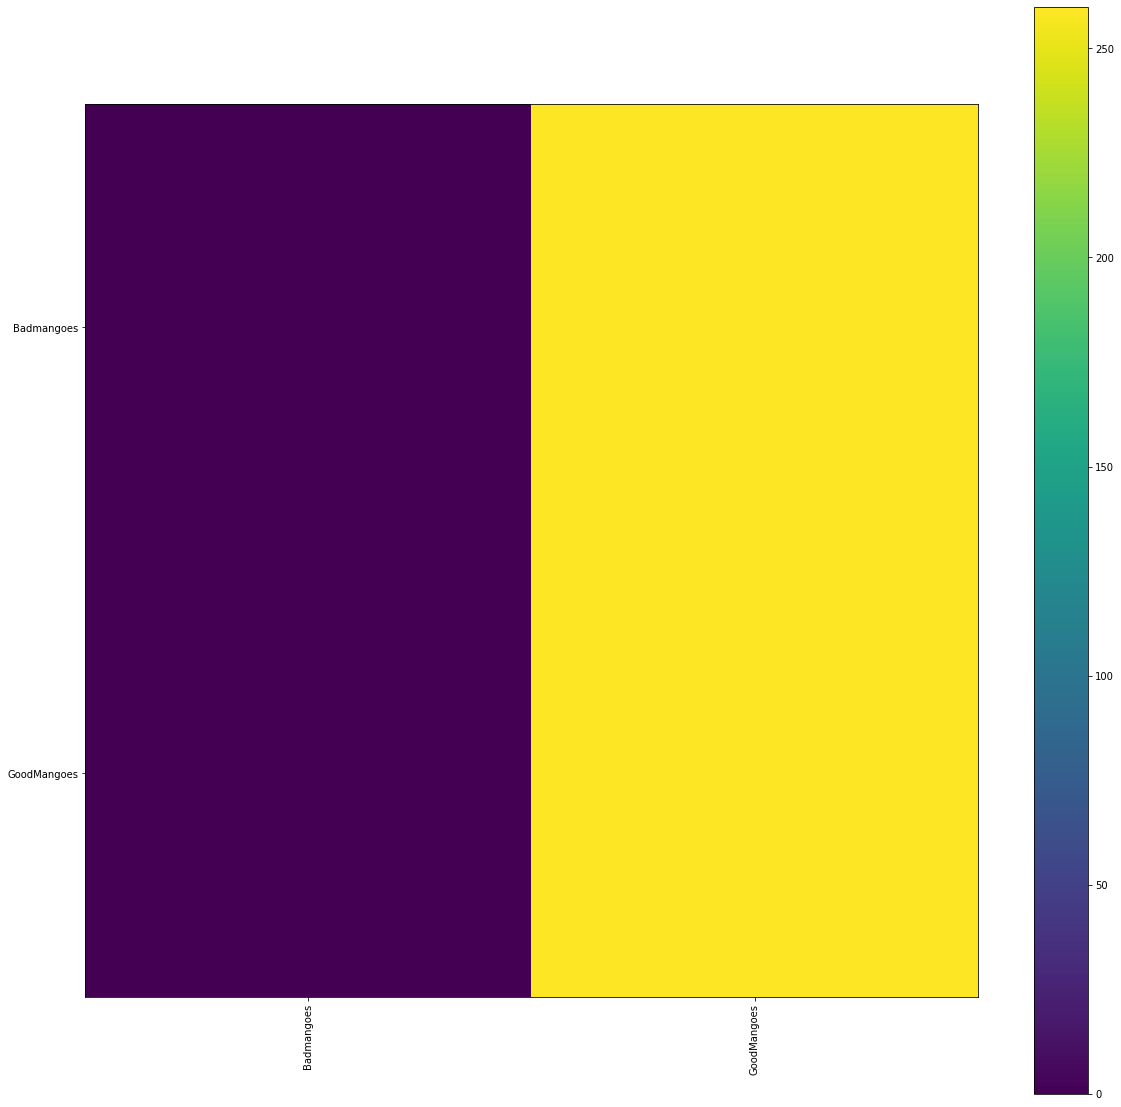

In [10]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 102,96,3
model = load_model('/content/modelmangocheck.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 878
nb_validation_samples = 519

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)
